# Brithish Airways Forage Virtual Internship Task 1

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

The data is collected form the skytrax website [click to go to website](https://www.airlinequality.com/airline-reviews/british-airways) the wesite has by default 10 review per pge and total 363 pages for a particular page with particular no of reviews the link is [https://www.airlinequality.com/airline-reviews/british-airways/page/pagenumber/?sortby=post_date%3ADesc&pagesize=pagesize]


break the url into 2 parts 
+ base url =https://www.airlinequality.com/airline-reviews/british-airways
+ additional url =/page/pagenumber/?sortby=post_date%3ADesc&pagesize=pagesize

Lets take 100 reviews per page and 30 pages

## Getting the reviews (Webscrapping)

In [2]:
no_of_pages =30
page_size=100
url_b="https://www.airlinequality.com/airline-reviews/british-airways"
BA_reviews = []

for i in range(1, no_of_pages + 1):
    print(f"page number {i}")
    url = f"{url_b}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
    response = requests.get(url)
  
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        BA_reviews.append(para.get_text())

page number 1
page number 2
page number 3
page number 4
page number 5
page number 6
page number 7
page number 8
page number 9
page number 10
page number 11
page number 12
page number 13
page number 14
page number 15
page number 16
page number 17
page number 18
page number 19
page number 20
page number 21
page number 22
page number 23
page number 24
page number 25
page number 26
page number 27
page number 28
page number 29
page number 30


In [3]:
BA_db=pd.DataFrame()
BA_db["review"]=BA_reviews

In [4]:
BA_db

,review
0,✅ Trip Verified | My family flew from Washing...
1,✅ Trip Verified | Easy check in a T5. Galleri...
2,"Not Verified | Flight delayed by an hour, it ..."
3,Not Verified | The staff are very rude and not...
4,✅ Trip Verified | Good domestic flight operat...
...,...
2995,LHR-PHL return. First only half full on both l...
2996,This was the last flight in a One World around...
2997,London Gatwick (LGW) to Lanzarote (ACE). We ha...
2998,DEL-LHR-HAM in Business. The club world produc...


In [5]:
import csv

In [6]:
name="BA_reviews.csv"
BA_db.to_csv(name,index =False,encoding='utf-8')

In [7]:
db_size=BA_db.size

In [8]:
db_shape=BA_db.shape

## Clean the Review data 


In [9]:
clean_BA_db=pd.DataFrame()
clean_BA_db["reviews"]= BA_db.review.str.split('|',expand=True)[1]
clean_BA_db

,reviews
0,My family flew from Washington to London on ...
1,Easy check in a T5. Galleries south and Nort...
2,"Flight delayed by an hour, it happens, no bi..."
3,The staff are very rude and not trained prope...
4,Good domestic flight operated by BA Cityflye...
...,...
2995,None
2996,None
2997,None
2998,None


In [10]:
import numpy as np

clean_BA_db['reviews'] = clean_BA_db['reviews'].replace('', np.nan)

# Drop rows with any missing values in column1
clean_BA_db = clean_BA_db.dropna(subset=['reviews'])

In [11]:
clean_BA_db

,reviews
0,My family flew from Washington to London on ...
1,Easy check in a T5. Galleries south and Nort...
2,"Flight delayed by an hour, it happens, no bi..."
3,The staff are very rude and not trained prope...
4,Good domestic flight operated by BA Cityflye...
...,...
2269,Istanbul to London Heathrow with British Air...
2270,London Heathrow to Houston on British Airway...
2271,We have flown with British Airways over 100 ...
2272,British Airways from Seattle to Johannesburg...


In [12]:
print(clean_BA_db)

                                                reviews
0       My family flew from Washington to London on ...
1       Easy check in a T5. Galleries south and Nort...
2       Flight delayed by an hour, it happens, no bi...
3      The staff are very rude and not trained prope...
4       Good domestic flight operated by BA Cityflye...
...                                                 ...
2269    Istanbul to London Heathrow with British Air...
2270    London Heathrow to Houston on British Airway...
2271    We have flown with British Airways over 100 ...
2272    British Airways from Seattle to Johannesburg...
2274    Gatwick to Amsterdam in Business class was t...

[2101 rows x 1 columns]


In [13]:
import re

# Dfunction to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
clean_BA_db['Cleaned Reviews'] =clean_BA_db['reviews'].apply(clean)
clean_BA_db.head()

<ipython-input-13-e09c553032e8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_BA_db['Cleaned Reviews'] =clean_BA_db['reviews'].apply(clean)


,reviews,Cleaned Reviews
0,My family flew from Washington to London on ...,My family flew from Washington to London on a...
1,Easy check in a T5. Galleries south and Nort...,Easy check in a T Galleries south and North l...
2,"Flight delayed by an hour, it happens, no bi...",Flight delayed by an hour it happens no biggi...
3,The staff are very rude and not trained prope...,The staff are very rude and not trained prope...
4,Good domestic flight operated by BA Cityflye...,Good domestic flight operated by BA Cityflyer...


In [14]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
nltk.download('vader_lexicon')
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to C:\Users\KALASH
[nltk_data]     SAHARE\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\KALASH
[nltk_data]     SAHARE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\KALASH
[nltk_data]     SAHARE\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\KALASH
[nltk_data]     SAHARE\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\KALASH
[nltk_data]     SAHARE\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\KALASH SAHARE\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_percept

True

In [15]:
# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

clean_BA_db['POS tagged'] = clean_BA_db['Cleaned Reviews'].apply(token_stop_pos)
clean_BA_db.head()

<ipython-input-15-635845620346>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_BA_db['POS tagged'] = clean_BA_db['Cleaned Reviews'].apply(token_stop_pos)


,reviews,Cleaned Reviews,POS tagged
0,My family flew from Washington to London on ...,My family flew from Washington to London on a...,"[(family, n), (flew, v), (Washington, n), (Lon..."
1,Easy check in a T5. Galleries south and Nort...,Easy check in a T Galleries south and North l...,"[(Easy, a), (check, n), (Galleries, n), (south..."
2,"Flight delayed by an hour, it happens, no bi...",Flight delayed by an hour it happens no biggi...,"[(Flight, n), (delayed, v), (hour, n), (happen..."
3,The staff are very rude and not trained prope...,The staff are very rude and not trained prope...,"[(staff, n), (rude, a), (trained, v), (properl..."
4,Good domestic flight operated by BA Cityflye...,Good domestic flight operated by BA Cityflyer...,"[(Good, a), (domestic, a), (flight, n), (opera..."


In [16]:
# Obtaining the stem words – Lemmatization

wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

clean_BA_db['Lemma'] = clean_BA_db['POS tagged'].apply(lemmatize)
clean_BA_db.head()

<ipython-input-16-4ca0ca147c64>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_BA_db['Lemma'] = clean_BA_db['POS tagged'].apply(lemmatize)


,reviews,Cleaned Reviews,POS tagged,Lemma
0,My family flew from Washington to London on ...,My family flew from Washington to London on a...,"[(family, n), (flew, v), (Washington, n), (Lon...",family fly Washington London British Airways...
1,Easy check in a T5. Galleries south and Nort...,Easy check in a T Galleries south and North l...,"[(Easy, a), (check, n), (Galleries, n), (south...",Easy check Galleries south North lounge pack...
2,"Flight delayed by an hour, it happens, no bi...",Flight delayed by an hour it happens no biggi...,"[(Flight, n), (delayed, v), (hour, n), (happen...",Flight delay hour happen biggie us change ga...
3,The staff are very rude and not trained prope...,The staff are very rude and not trained prope...,"[(staff, n), (rude, a), (trained, v), (properl...",staff rude train properly exception make chi...
4,Good domestic flight operated by BA Cityflye...,Good domestic flight operated by BA Cityflyer...,"[(Good, a), (domestic, a), (flight, n), (opera...",Good domestic flight operate BA Cityflyer Gr...


In [17]:
sid = SentimentIntensityAnalyzer()

def get_sentiment(text):
    sentiment_scores = sid.polarity_scores(text)
    if sentiment_scores['compound'] >= 0.05:
        return 'positive'
    elif sentiment_scores['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

clean_BA_db['sentiment'] = clean_BA_db['Lemma'].apply(get_sentiment)

<ipython-input-17-a0026ce0df1d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_BA_db['sentiment'] = clean_BA_db['Lemma'].apply(get_sentiment)


In [18]:
name1="BA_SentimentalAnalysis.csv"
clean_BA_db.to_csv(name1,index =False,encoding='utf-8')

In [19]:
vader_counts = clean_BA_db['sentiment'].value_counts()
vader_counts

positive    1308
negative     766
neutral       27
Name: sentiment, dtype: int64

([<matplotlib.patches.Wedge at 0x1ff47bde130>,
 [Text(-0.4131514777814059, 1.0194635140146215, 'positive'),
  Text(0.371667499632305, -1.035308296942061, 'negative'),
  Text(1.3488999287413563, -0.054488367947332854, 'neutral')],
 [Text(-0.22535535151713046, 0.556071007644339, '62.3%'),
  Text(0.20272772707216632, -0.5647136165138514, '36.5%'),
  Text(0.8493073625408539, -0.03430749092980216, '1.3%')])

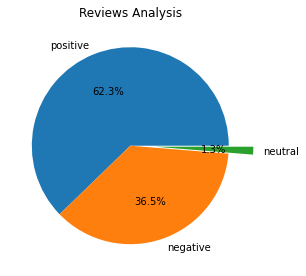

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

In [21]:
!pip install wordcloud
!pip install --upgrade wordcloud


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(clean_BA_db.Lemma)

AttributeError: 'TransposedFont' object has no attribute 'getbbox'

<ipython-input-21-e7efdbe08fd6>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_BA_db['Color'] = clean_BA_db['sentiment'].map(colors)
D:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


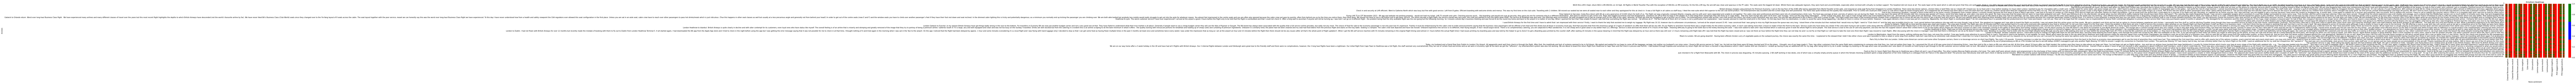

In [21]:
import seaborn as sns
colors = {
    'positive': 'green',
    'negative': 'red',
    'neutral': 'blue'
}

# Map sentiment labels to colors
clean_BA_db['Color'] = clean_BA_db['sentiment'].map(colors)




In [24]:
# Create an Emotion Heatmap
plt.figure(figsize=(576x432)
heatmap=clean_BA_db.pivot_table(index='reviews', columns='sentiment', aggfunc=len, fill_value=0),
sns.heatmap(heatmap, cmap=[colors['negative'], colors['neutral'], colors['positive']],
            annot=True, fmt="d")
plt.yticks(range(len(heatmap.index)), range(1, len(heatmap_data.index) + 1))

plt.title('Emotion Heatmap')
plt.show()

ValueError: Must pass 2-d input. shape=(1, 2101, 12)

<Figure size 576x432 with 0 Axes>